# My LEEDS 2023

Prepares data for the My LEEDS 2023 page 

In [1]:
import os
from events import (
    load_event_data, filter_by_project, prepare, save_files, count_wards
)

Set output directory

In [2]:
OUT_DIR = '../../../../docs/metrics/events/my-leeds-2023/_data/events'

Read in event data and filter by **My LEEDS 2023** project

In [3]:
data = load_event_data().pipe(filter_by_project, '12 - My LEEDS 2023')

Run the processing and save the files

In [4]:
data = data.pipe(prepare).pipe(save_files, OUT_DIR)
print(data)

      actual_audience_size_number_of_participants_in_person  \
265                                                 NaN       
266                                                 NaN       
268                                                 NaN       
279                                                 NaN       
288                                                 NaN       
299                                                 NaN       
302                                                 NaN       
314                                                 NaN       
322                                                 NaN       
332                                                 NaN       
334                                                 NaN       
785                                               600.0       
809                                               500.0       
810                                              2500.0       
812                                                 NaN

In [5]:
SUMMER_OUT_DIR = f'{OUT_DIR}/summer'
os.makedirs(SUMMER_OUT_DIR, exist_ok=True)
data = data.loc[data.event_name.str.contains('Summer')].pipe(save_files, SUMMER_OUT_DIR)
print(data)

      actual_audience_size_number_of_participants_in_person  \
785                                               600.0       
809                                               500.0       
810                                              2500.0       
821                                              3500.0       
822                                               500.0       
823                                                 NaN       
849                                               400.0       
850                                               250.0       
851                                              2350.0       
855                                               300.0       
856                                              3154.0       
873                                               100.0       
882                                               143.0       
885                                               500.0       
886                                               500.0

Print a list of events which have no ward, or more than one

In [6]:
data[data.pipe(count_wards) != 1][[
    'airtable_id',
    'event_name',
    'start_date',
    'ward_(from_venue)',
]]

,airtable_id,event_name,start_date,ward_(from_venue)
885,430,My LEEDS Summer: Alwoodley Festival of Sport a...,2023-07-09,"['Alwoodley', 'Alwoodley', 'Alwoodley', 'Alwoo..."


Print a list of events with no audience recorded

In [7]:
data[data.audience_size == 0][[
    'airtable_id', 'event_name', 'start_date', 'audience_size'
]]

,airtable_id,event_name,start_date,audience_size
823,417,My LEEDS Summer: Moortown Picnic in the Park,2023-06-24,0.0
914,446,My LEEDS Summer: Morley South,2023-07-23,0.0
960,454,"My LEEDS Summer: Killingbeck & Seacroft Show, ...",2023-08-12,0.0
977,459,My LEEDS Summer: Calverley & Farsley - Are you...,2023-08-26,0.0


event_type
['Public Event - Performance']    35
Name: event_name, dtype: int64

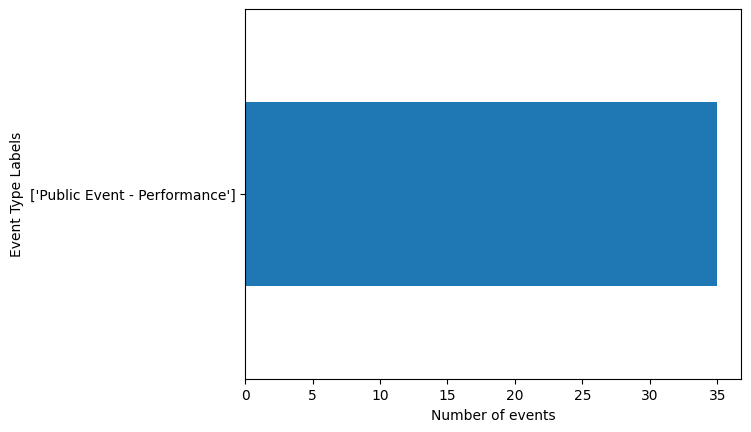

In [8]:
plot = data.groupby('event_type').event_name.count().plot.barh()
plot.xaxis.label.set_text('Number of events')
plot.yaxis.label.set_text('Event Type Labels')
data.groupby('event_type').event_name.count()